In [145]:
%load_ext autoreload
%autoreload 2

# numerical packages
from copy import copy, deepcopy
import numpy as np
import scipy as sp
from scipy.optimize import minimize

# for visualization (plot and animation)
import matplotlib.pyplot as plt
import matplotlib.animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from IPython.display import Image
from IPython.display import Video

# for drawing Bloch sphere
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization.bloch import Bloch

# my class for the task1
from PSRWST import PSRWSTSolver


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Problem 1
Provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state. By most general 1 qubit state we mean that there exists a set of the parameters in the circuit such that any point in the Bloch sphere can be reached. Check that the circuit works correctly by showing that by varying randomly the parameters of your circuit you can reproduce correctly the Bloch sphere.

In the class PSRWSTSolver(Product State Reproduce With SWAP-Test solver), a method circuit_embeding is a variational circuit which can generate whole possible quantum states on the Bloch sphere with two parameters, $\theta$ and $\phi$, where each refers the azimuthal angle and polar angle. I used the below equation.  
${\displaystyle |\psi \rangle =\cos \left(\theta /2\right)|0\rangle \,+\,e^{i\phi }\sin \left(\theta /2\right)|1\rangle =\cos \left(\theta /2\right)|0\rangle \,+\,(\cos \phi +i\sin \phi )\,\sin \left(\theta /2\right)|1\rangle }$, where $ 0\leq \theta \leq \pi $ and $ 0\leq \phi <2\pi$.  
To show my variational circuit can cover whole points in the Bloch sphere, I created an animation below. Bloch vector will moves up and down while rotating around the polar angle. I saved this animation and wrote a code for loading it.

In [177]:
solver = PSRWSTSolver()

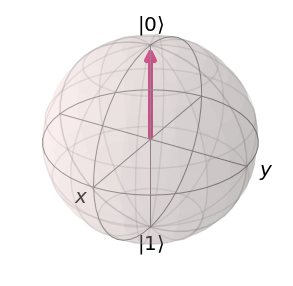

In [178]:
ani_sweep_Bloch_sphere = solver.sweep_on_bloch_sphere()

In [144]:
ani_sweep_Bloch_sphere.save('./images/single_qubit_sweeping.mp4')

In [146]:
Video('./images/single_qubit_sweeping.mp4')

#### Problem 2 and 3
##### Problem 2
Use the circuit built in step 1) and, using the SWAP test, find the best choice of your parameters to reproduce a randomly generated quantum state made with 1 qubit.

##### Problem 3
Suppose you are given with a random state, made by N qubits, for which you only know that it is a product state and each of the qubits are in the state | 0 > or | 1>. By product state we mean that it can be written as the product of single qubit states, without the need to do any summation. 

For example, the state
|a> = |01>
Is a product state, while the state
|b> = |00> + |11>
Is not.

Perform a qubit by qubit SWAP test to reconstruct the state. This part of the problem can be solved via a simple grid search.


I think that the problem 2 is sub-problem of the problem 3. Therefore, I provide general explainations about the codes related to reproducing multi-qubit product state with SWAP test.  
\
\
In the class PSRWSTSolver, N_qubit_embeding can generate random N qubits state vector with 2N parameters(N azimuthal angles and N polar angles). This method is based on the above metioned method circuit_embeding. To implement SWAP test for two N qubit system, (2N+1) qubit is required, which means $2^{(2N+1)}$ size vector is required for the state vector in general. However, the problem restricted the quantum states into the product state, which means there are no entanglement over qubits on single quantum states. Moreover, since SWAP test should be performed on each qubit seperately, the structure of the quantum state can be decribed as below.\
\
$H = \mathbb{C}^2 \bigotimes \left(\bigoplus_{i = 1}^N(\mathbb{C}^2 \bigotimes \mathbb{C}^2) \right)$ \
\
Since this space has much small size, 8N, then the original state vector, we can use this algorithm for large qubit systems. 
\
I drew the a static figure in parameter spaces with arrows to show the optimizing trajectory. Unfortunately, this seems not insightful. Therefore, I created animations show the optimizing process on the bloch sphere.

### Problem 2

In [199]:
solver = PSRWSTSolver()
number_of_qubits = 1
random_parameters = 2 * np.pi * np.random.random((number_of_qubits, 2))
result, trajectory = solver.reproduce_quantum_state(random_parameters)

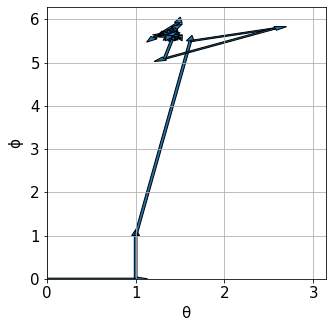

In [200]:
solver.show_static_parameter_space_trajectory(figsize = (5, 5), fontsize = 15)

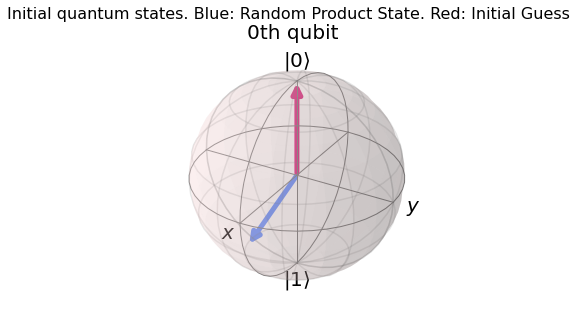

In [188]:
number_of_animation_frame = 30
animation = solver.show_N_qubit_optimization_trajectory_on_bloch_sphere(number_of_animation_frame = number_of_animation_frame)

In [189]:
animation.save('./images/single_qubit_reconstruction.mp4')

In [192]:
Video('./images/single_qubit_reconstruction.mp4')

### Problem 3

In [202]:
solver = PSRWSTSolver()
number_of_qubits = 5
random_parameters = 2 * np.pi * np.random.random((number_of_qubits, 2))
result, trajectory = solver.reproduce_quantum_state(random_parameters)

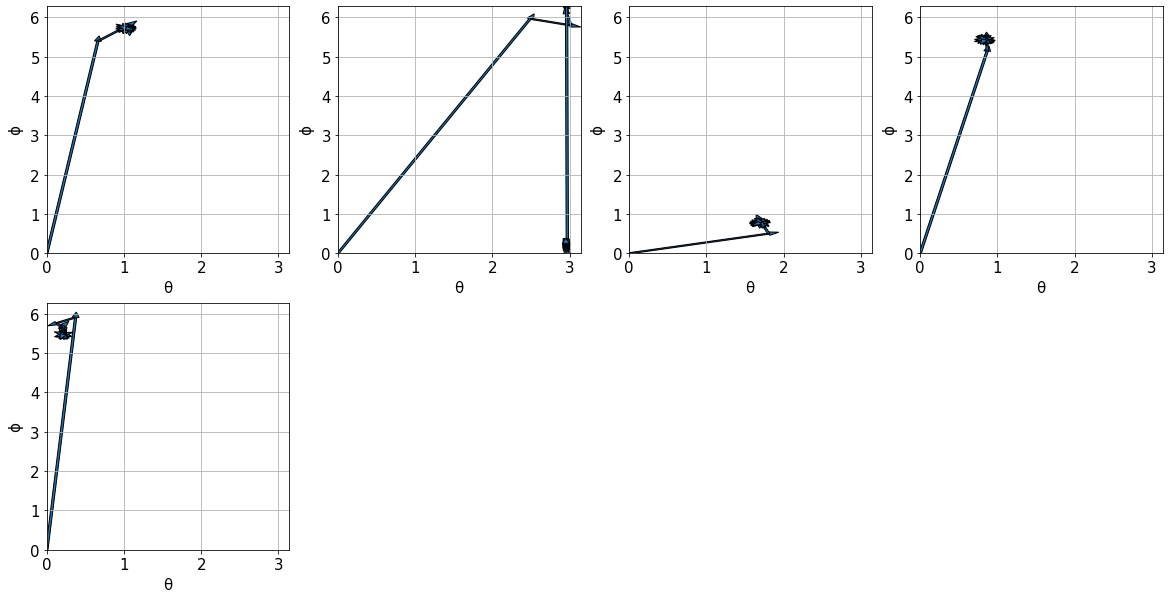

In [203]:
solver.show_static_parameter_space_trajectory(figsize = (5, 5), fontsize = 15)

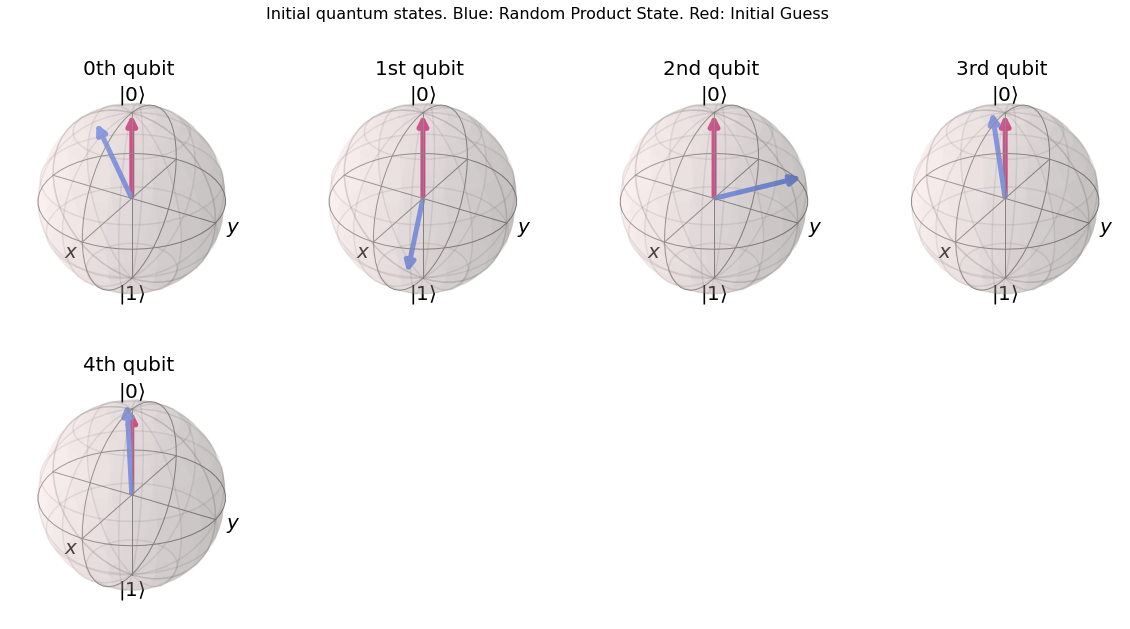

In [204]:
number_of_animation_frame = 30
animation = solver.show_N_qubit_optimization_trajectory_on_bloch_sphere(number_of_animation_frame = number_of_animation_frame)

In [205]:
animation.save('./images/5_qubit_reconstruction.mp4')

In [206]:
Video('./images/5_qubit_reconstruction.mp4')

### Problem 3+
I created below figure to show my algorithm works well for large qubit systems too. The plot is average fidelity between random state and regenerated state. Red area shows the standard deviation about seven trials for different random states. \
It looks fine for almost 50 qubits; however, the fidelity decreased for more large qubits. I think there are two ways to solve this issues: one is algorithmic and the other is systemic.
Firstly, for the algorithmic methods, we can adopt multi-dimentional non convex optimization algorithms such as the particle swarm optimization(PSO) or adopt the reinforcement learning. Since I have experience on both of them, I will try these after the submission. Secondly, for the systemic approach, we can use more reference qubits. I think it might works fine with adding single reference qubit for 50 quantum state qubits. 

In [ ]:
## Since this function took lots of time, I saved the result image.
N_qubit_range = 100
N_iter = 7
N_qubits = np.arange(1, N_qubit_range + 1)
mean_fidelity = np.zeros_like(N_qubits, dtype = float)
std_fidelity = np.zeros_like(N_qubits, dtype = float)

for n in N_qubits:
    print(str(n) + "qubit SWAP test")
    fidelities = []
    for i in range(N_iter):
        # randomly generated quantum state:  random_state
        random_parameters = 2 * np.pi * np.random.random((n, 2))
        result, _ = solver.reproduce_quantum_state(random_parameters)
        for res_param, random_parameter in zip(result, random_parameters):  
            fid = solver.fideltity_two_qubits(solver.circuit_embeding(res_param).flatten(), solver.circuit_embeding(random_parameter).flatten())
            fidelities.append(fid)
    mean_fidelity[n-1] = np.mean(fidelities)
    std_fidelity[n-1] = np.std(fidelities)

1qubit SWAP test
2qubit SWAP test
3qubit SWAP test
4qubit SWAP test
5qubit SWAP test
6qubit SWAP test
7qubit SWAP test
8qubit SWAP test
9qubit SWAP test
10qubit SWAP test
11qubit SWAP test
12qubit SWAP test
13qubit SWAP test
14qubit SWAP test
15qubit SWAP test
16qubit SWAP test
17qubit SWAP test


In [ ]:
fig = plt.figure(figsize=(20, 12))
ax = fig.subplots()
ax.set_xlabel('Number of qubits', fontsize=15)
ax.set_ylabel('Fidelity', fontsize=15)
ax.set_title('Fidelity between randomly generated state and reproduced state via SWAP test', fontsize=20)

# color = ax._get_lines.color_cycle.next()

max_idx = 90

ax.plot(N_qubits[:max_idx], mean_fidelity[:max_idx], color = 'black') # , color=color)
ax.fill_between(N_qubits[:max_idx], mean_fidelity[:max_idx] + std_fidelity[:max_idx], mean_fidelity[:max_idx] - std_fidelity[:max_idx], color='red', alpha=0.3)
plt.axis([N_qubits[0], N_qubits[max_idx-1], 0.95, 1])
fig.savefig('images/fidelities.png')

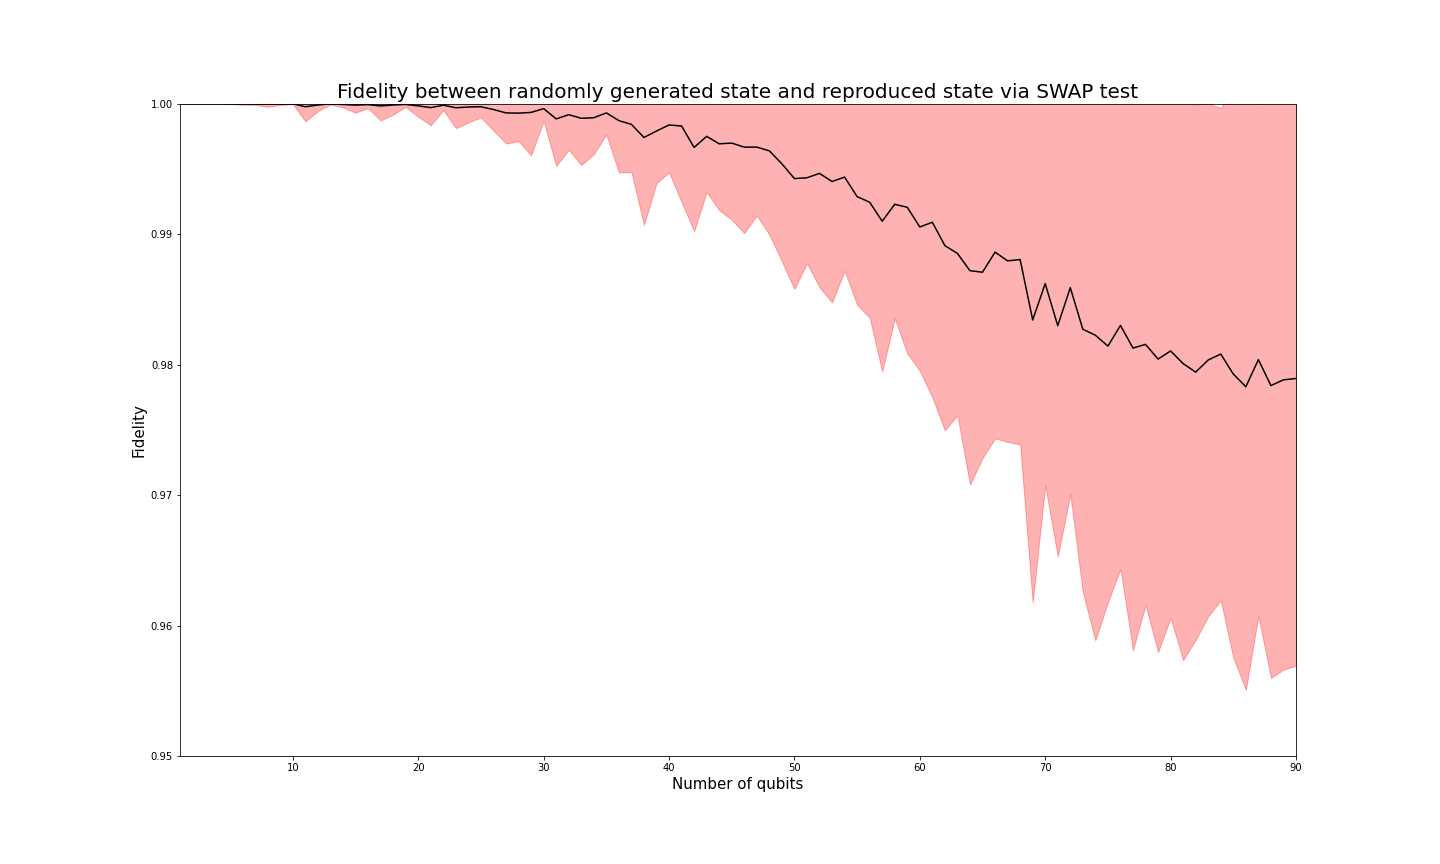

In [137]:
Image('images/fidelities.png')